## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [1]:
import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.preprocessing import normalize

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
batch_size = 60
num_classes = 10
epochs = 10

In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
X_train.shape, X_train[0].shape, y_train.shape

((60000, 784), (784,), (60000, 10))

In [6]:
mnist_model = Sequential()

mnist_model.add(Dense(512, input_dim=784, activation='relu'))
mnist_model.add(Dropout(0.2))
mnist_model.add(Dense(128, activation='relu'))
mnist_model.add(Dropout(0.2))
mnist_model.add(Dense(64, activation='relu'))
mnist_model.add(Dropout(0.2))
mnist_model.add(Dense(32, activation='relu'))
mnist_model.add(Dense(10, activation='softmax'))

mnist_model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

mnist_model.summary()

W0123 10:16:13.622308  4120 deprecation.py:506] From C:\Users\John\Anaconda3\envs\U4-S2-NN\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2

In [7]:
history = mnist_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=False, validation_data=(X_test, y_test))
scores = mnist_model.evaluate(X_test, y_test)
print(f'{mnist_model.metrics_names[1]}: {scores[1]*100}')

10000/10000 [==============================] - 0s 21us/sample - loss: 0.4251 - acc: 0.8482
acc: 84.82000231742859


In [11]:
print(f'{mnist_model.metrics_names[1]}: {scores[1]*100}')

acc: 84.82000231742859


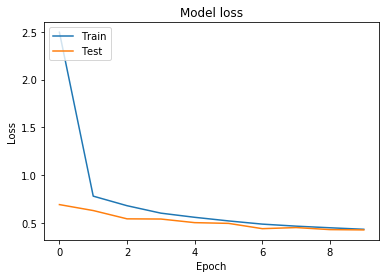

In [8]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.